<a href="https://colab.research.google.com/github/Killian64100/-Extending-AlexNet-for-Image-Classification-Deep-learning/blob/main/AlexNet_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive (to save your work and access files)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [ ]:
# Define a simple AlexNet-like model for CIFAR-10 (adjusted for small images)
class SimpleAlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(SimpleAlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),  # Conv1
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Pool1
            nn.Conv2d(64, 128, kernel_size=3, padding=1),  # Conv2
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Pool2
            nn.Conv2d(128, 256, kernel_size=3, padding=1),  # Conv3
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)  # Pool3
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 4 * 4, 512),  # Flattening the feature maps to 1D
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(512, num_classes)  # Output layer (10 classes for CIFAR-10)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)  # Flatten the output from Conv layers
        x = self.classifier(x)
        return x

In [ ]:
# Prepare the CIFAR-10 data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data = datasets.CIFAR10(root='/content/drive/MyDrive/Analysis/PROJECT_ANALYSIS', train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root='/content/drive/MyDrive/Analysis/PROJECT_ANALYSIS', train=False, download=True, transform=transform)


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Load the data into DataLoader for batch processing
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

In [ ]:
# Initialize the model, loss function, and optimizer
model = SimpleAlexNet(num_classes=10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# Training loop (for 10 epochs)
for epoch in range(10):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass (compute gradients)
        optimizer.step()  # Update weights

        running_loss += loss.item()  # Accumulate loss
        _, predicted = torch.max(outputs, 1)  # Get predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()  # Count correct predictions

    print(f'Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%')









Epoch 1, Loss: 1.4651, Accuracy: 46.49%
Epoch 2, Loss: 1.0687, Accuracy: 62.39%
Epoch 3, Loss: 0.8991, Accuracy: 68.76%
Epoch 4, Loss: 0.8066, Accuracy: 71.88%
Epoch 5, Loss: 0.7365, Accuracy: 74.38%
Epoch 6, Loss: 0.6793, Accuracy: 76.16%
Epoch 7, Loss: 0.6382, Accuracy: 77.67%
Epoch 8, Loss: 0.6048, Accuracy: 78.81%
Epoch 9, Loss: 0.5751, Accuracy: 79.91%
Epoch 10, Loss: 0.5381, Accuracy: 81.13%


In [ ]:
# Test the model
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():  # No need to compute gradients during testing
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')

Test Accuracy: 79.13%


In [ ]:
from torchvision import models

model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 10)  # Adjust the final layer for CIFAR-10 (10 classes)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 37.5MB/s]


In [ ]:
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
scheduler.step()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)



/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:224: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


In [ ]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


In [ ]:
nn.BatchNorm2d(64)


BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

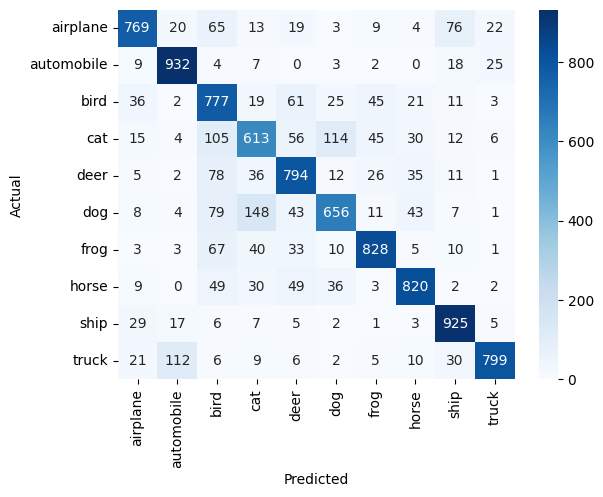

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_data.classes, yticklabels=train_data.classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:
# Save the model
torch.save(model.state_dict(), '/content/drive/MyDrive/Analysis/PROJECT_ANALYSIS/alexnet_model.pth')

# Load the model
model.load_state_dict(torch.load('/content/drive/MyDrive/Analysis/PROJECT_ANALYSIS/alexnet_model.pth'))


<ipython-input-13-190d95dfa2df>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/MyDrive/Analysis/PROJECT_ANALYSIS/alexnet_m

<All keys matched successfully>

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=train_data.classes))


              precision    recall  f1-score   support

    airplane       0.07      0.02      0.03      1000
  automobile       0.10      0.54      0.17      1000
        bird       0.10      0.14      0.12      1000
         cat       0.09      0.12      0.10      1000
        deer       0.06      0.01      0.01      1000
         dog       0.03      0.00      0.00      1000
        frog       0.09      0.03      0.05      1000
       horse       0.11      0.04      0.06      1000
        ship       0.09      0.03      0.05      1000
       truck       0.08      0.03      0.04      1000

    accuracy                           0.10     10000
   macro avg       0.08      0.10      0.06     10000
weighted avg       0.08      0.10      0.06     10000



The below are the steps for improvement of the model

In [ ]:
from torchvision import models
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 10)  # Adjust for CIFAR-10


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 137MB/s]


In [ ]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


Files already downloaded and verified


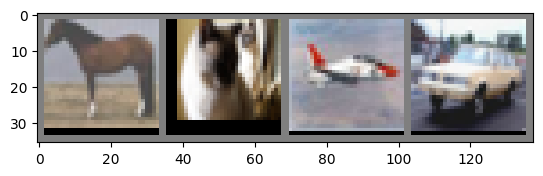

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Load the CIFAR-10 dataset with the applied transformation
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=4, shuffle=True)

# Get a batch of training data
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Helper function to unnormalize and show images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()  # Convert tensor to numpy array
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Convert to HWC format
    plt.show()

# Display images
imshow(torchvision.utils.make_grid(images))


In [ ]:
# Ensure you've defined the model, loss function, and optimizer:
model = SimpleAlexNet(num_classes=10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Set up the training loop:
for epoch in range(10):  # For 10 epochs, you can change the number of epochs
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass (compute gradients)
        optimizer.step()  # Update weights

        running_loss += loss.item()  # Accumulate loss
        _, predicted = torch.max(outputs, 1)  # Get predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()  # Count correct predictions

    print(f'Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%')


Epoch 1, Loss: 1.4596, Accuracy: 46.47%
Epoch 2, Loss: 1.0749, Accuracy: 61.68%
Epoch 3, Loss: 0.9087, Accuracy: 67.86%
Epoch 4, Loss: 0.8086, Accuracy: 71.64%
Epoch 5, Loss: 0.7357, Accuracy: 74.24%
Epoch 6, Loss: 0.6824, Accuracy: 76.13%
Epoch 7, Loss: 0.6435, Accuracy: 77.41%
Epoch 8, Loss: 0.6011, Accuracy: 78.90%
Epoch 9, Loss: 0.5641, Accuracy: 80.11%
Epoch 10, Loss: 0.5373, Accuracy: 80.97%


In [ ]:
# After training, evaluate the model on the test set
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():  # No need to compute gradients during testing
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')


Test Accuracy: 79.74%


Epoch 1, Loss: 0.5070, Accuracy: 82.07%
Epoch 2, Loss: 0.4953, Accuracy: 82.45%
Epoch 3, Loss: 0.4761, Accuracy: 83.18%
Epoch 4, Loss: 0.4485, Accuracy: 84.20%
Epoch 5, Loss: 0.4332, Accuracy: 84.77%
Epoch 6, Loss: 0.4220, Accuracy: 85.18%
Epoch 7, Loss: 0.4121, Accuracy: 85.64%
Epoch 8, Loss: 0.3984, Accuracy: 86.08%
Epoch 9, Loss: 0.3864, Accuracy: 86.42%
Epoch 10, Loss: 0.3743, Accuracy: 87.01%


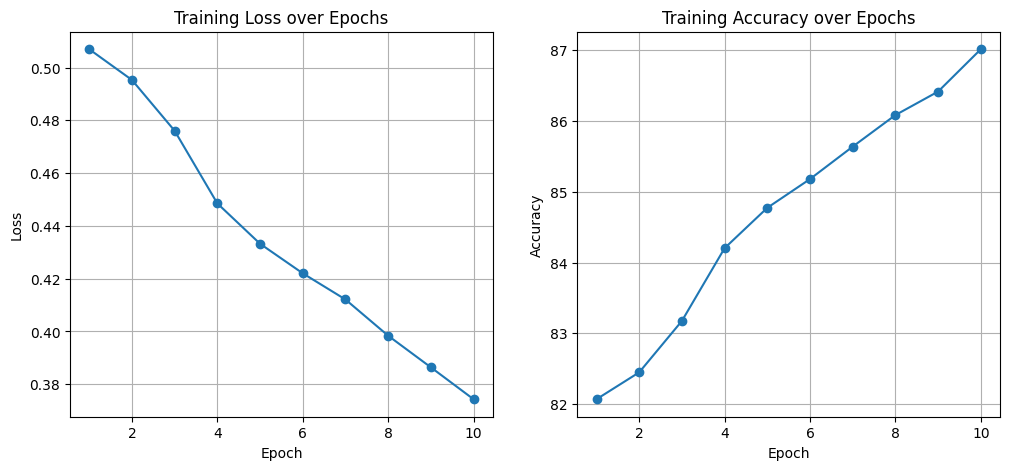

In [ ]:
import matplotlib.pyplot as plt

# Lists to store the loss and accuracy values over each epoch
train_losses = []
train_accuracies = []

# Training loop with loss and accuracy tracking
for epoch in range(10):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass (compute gradients)
        optimizer.step()  # Update weights

        running_loss += loss.item()  # Accumulate loss
        _, predicted = torch.max(outputs, 1)  # Get predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()  # Count correct predictions

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')

# Plot training loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), train_losses, marker='o', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.grid(True)

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), train_accuracies, marker='o', label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')
plt.grid(True)

plt.show()
